In [49]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
all_data = pd.read_csv('./data/fifa/all_players.csv')
female_players = pd.read_csv('./data/fifa/female_players.csv')
male_players = pd.read_csv('./data/fifa/male_players.csv')

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_38897/2968712607.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('./data/fifa/all_players.csv')


In [51]:
#Del the first column
all_data.drop('Unnamed: 0', axis = 1, inplace= True)
female_players.drop('Unnamed: 0', axis = 1, inplace= True)
male_players.drop('Unnamed: 0', axis = 1, inplace= True)

all_data

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,2,Rodri,91,66,80,86,84,87,85,65,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17732,17146,Araya Dennis,53,42,57,49,52,25,42,44,...,England,Barclays WSL,Spurs,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17733,17146,Alexia Férnandez,53,53,55,51,53,34,47,52,...,Spain,Liga F,Granada CF,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17734,17146,Aleigh Gambone,53,60,58,53,56,49,53,58,...,United States,Scottish Women's League,Glasgow City FC,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
17735,17146,Joy Lysser,53,61,52,48,56,53,58,60,...,Switzerland,Schweizer Damen Liga,FC Zürich,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


All_data analysis

In [53]:
all_data.head()

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,2,Rodri,91,66,80,86,84,87,85,65,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [78]:
#Top 10 OVR
top10OVR = all_data.sort_values('OVR', ascending=False)[:10]
top10OVR = pd.DataFrame(top10OVR)
top10OVR

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16161,3,Aitana Bonmatí,91,81,86,86,91,77,75,82,...,Spain,Liga F,FC Barcelona,"Technical+, Finesse Shot, First Touch, Incisiv...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,2,Rodri,91,66,80,86,84,87,85,65,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16163,8,Caroline Graham Hansen,90,89,87,88,90,47,76,90,...,Norway,Liga F,FC Barcelona,"Trickster+, Finesse Shot, First Touch, Flair, ...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16164,10,Sam Kerr,90,85,88,74,90,42,83,86,...,Australia,Barclays WSL,Chelsea,"Finesse Shot+, Acrobatic, Aerial, Power Header...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16162,6,Alexia Putellas,90,82,89,90,91,72,78,81,...,Spain,Liga F,FC Barcelona,"First Touch+, Finesse Shot, Flair, Incisive Pa...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
6,11,Harry Kane,90,65,93,84,83,49,82,64,...,England,Bundesliga,FC Bayern München,"Finesse Shot+, First Touch, Incisive Pass, Lon...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


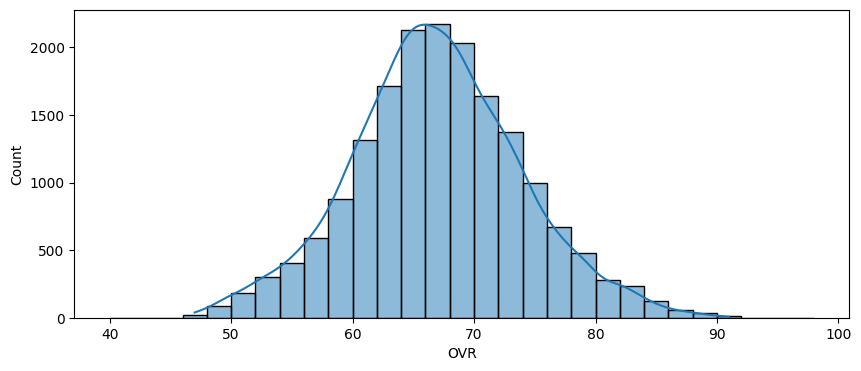

In [76]:
#Distribution based on OVR
bins = np.arange(40,100,2)
plt.figure(figsize=(10, 4))
sns.histplot(data = all_data, x='OVR', bins=bins, kde=True)
plt.show()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_38897/1783981588.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='OVR', data = all_data, order=position, palette=palette)


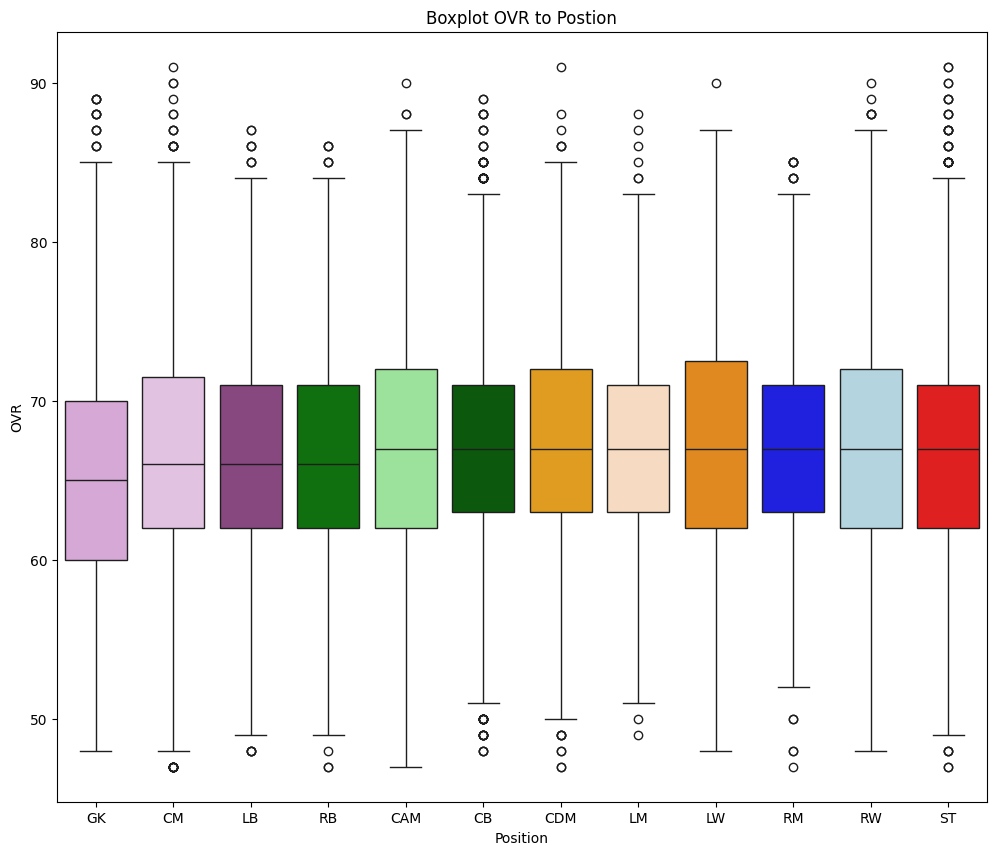

In [90]:
#Boxplot positions
palette = [
    (221/255, 160/255, 221/255),  # plum
    (230/255, 190/255, 230/255),  # light plum
    (145/255, 61/255, 136/255),   # deep plum
    (0/255, 128/255, 0/255),      # green
    (144/255, 238/255, 144/255),  # light green
    (0/255, 100/255, 0/255),      # dark green
    (255/255, 165/255, 0/255),    # orange
    (255/255, 218/255, 185/255),  # peach
    (255/255, 140/255, 0/255),    # dark orange
    (0/255, 0/255, 255/255),      # blue
    (173/255, 216/255, 230/255),  # light blue
    (255/255, 0/255, 0/255)       # red
]

plt.figure(figsize=(12,10))
position = all_data.groupby('Position')['OVR'].median().sort_values().index

sns.boxplot(x='Position', y='OVR', data = all_data, order=position, palette=palette)
plt.title('Boxplot OVR to Postion')
plt.show()


In [94]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17737 entries, 0 to 17736
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rank                   17737 non-null  int64  
 1   Name                   17737 non-null  object 
 2   OVR                    17737 non-null  int64  
 3   PAC                    17737 non-null  int64  
 4   SHO                    17737 non-null  int64  
 5   PAS                    17737 non-null  int64  
 6   DRI                    17737 non-null  int64  
 7   DEF                    17737 non-null  int64  
 8   PHY                    17737 non-null  int64  
 9   Acceleration           17737 non-null  int64  
 10  Sprint Speed           17737 non-null  int64  
 11  Positioning            17737 non-null  object 
 12  Finishing              17737 non-null  object 
 13  Shot Power             17737 non-null  int64  
 14  Long Shots             17737 non-null  object 
 15  Vo